### Chart Formatting

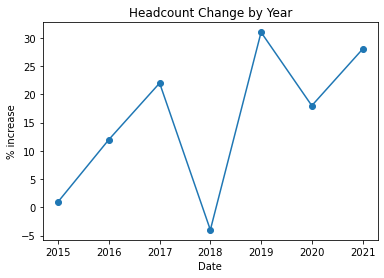

In [1]:
# Markers and Labels
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Make a simple line graph
x = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
y = [1, 12, 22, -4, 31, 18, 28]
# Add markers to illustrate each point more clearly
plt.plot(x, y, marker = 'o')
# Add a title
plt.title('Headcount Change by Year')
# Add an x axis label
plt.xlabel('Date')
# Add a y axis label
plt.ylabel('% increase')
# Show our plot
plt.show()

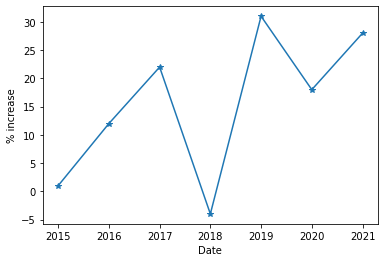

In [2]:
# Many other options are available
plt.plot(x, y, marker = '*')
plt.xlabel('Date')
plt.ylabel('% increase')
plt.show()
# See more here: https://matplotlib.org/stable/api/markers_api.html

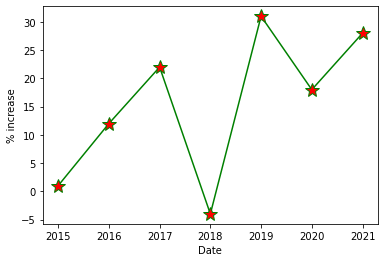

In [61]:
# mfc is Marker Fill Color, ms is Marker Size
# Line color can also be controlled with the color parameter
plt.plot(x, y, color = 'green', marker = "*", mfc = 'red', ms = 15)
plt.xlabel('Date')
plt.ylabel('% increase')
plt.show()

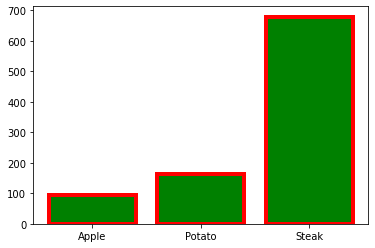

In [62]:
# Options are available for other chart types as well
# Although they often are referred to by different keywords
# Never be afraid to look it up!
# For example, bar charts
foods = ["Apple", "Potato", "Steak"]
calories = [95, 163, 679]
# The color, bar width, outline color, and outline width respectively are changed here
# plt.bar(foods, calories)
plt.bar(foods, calories, color = 'green', width = 0.8, edgecolor = 'red', linewidth = 4)
plt.show()

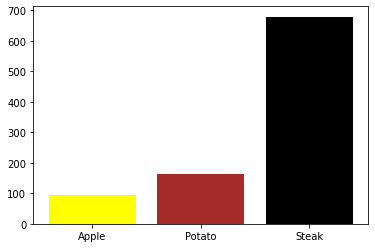

In [63]:
# More Color Options
# Pass a list to change the color of each bar instead of all of them simultaneously
plt.bar(foods, calories, color = ['yellow', 'brown', 'black'])
plt.show()

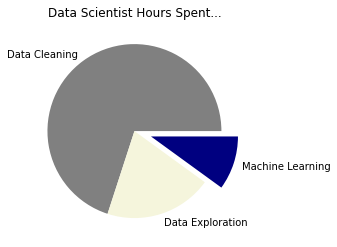

In [65]:
# Doing the same for a pie chart
# Create the labels and colors as lists
activities = ["Data Cleaning", "Data Exploration", "Machine Learning"]
times = np.array([70, 20, 10])
# Pass a list the same size as the one being plotted to colors
colors = ["gray", "beige", "navy"]
# Explode parameter pulls the "slice" out of the chart a bit
plt.pie(times, labels = activities, colors = colors, explode = (0, 0, 0.2))
plt.title("Data Scientist Hours Spent...")
plt.show()

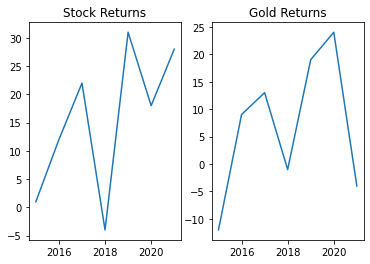

In [66]:
# Creating Multiple Plots
g_x = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
g_y = [-12, 9, 13, -1, 19, 24, -4]
# Create subplots
# First two parameters are dimensions (# of rows and # of columns), third is the position
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title("Stock Returns")
plt.subplot(1, 2, 2)
plt.plot(g_x, g_y)
plt.title("Gold Returns")
plt.show()

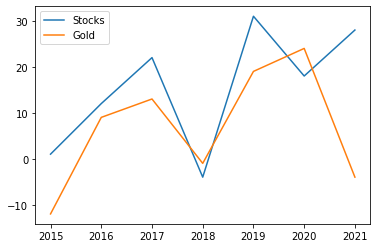

In [67]:
# What about on the same axes?
# Aka, a combo chart
# Add labels so you can create a legend later
plt.plot(x, y, label = "Stocks")
plt.plot(g_x, g_y, label = "Gold")
plt.legend(loc = "upper left")
plt.show()

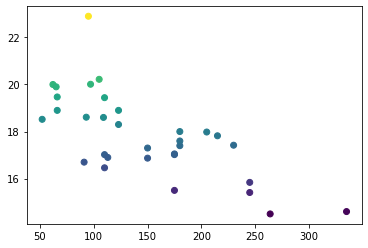

In [68]:
# Color Bars
# An interesting option with scatter plots
cars = pd.read_csv("cars.csv")
# More on this later - the color provides a third dimension
plt.scatter(cars["hp"], cars["qsec"], c = cars["qsec"])
# c = Color, cmap = Color map
plt.show()

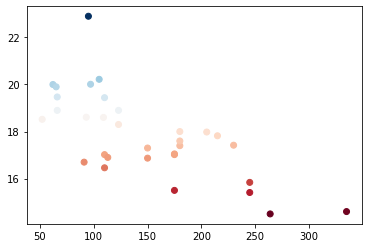

In [69]:
# What if we don't like the default colors?
plt.scatter(cars["hp"], cars["qsec"], c = cars["qsec"], cmap = "RdBu")
# c = Color, cmap = Color map
plt.show()
# While visually impressive, this plot still has a lot of shortcomings.
# No legend is specified.
# Further customization would require lots of code.
# This is better done in Seaborn.

### Seaborn

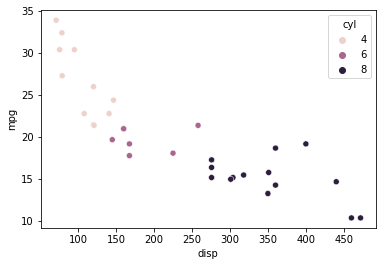

In [70]:
# Seaborn is great for many things, but the main application is multidimensional data
# What is multidimensional data?
# Well, on a computer we are by default looking at a 2-dimensional plane
# We can't actually make a 3 dimensional chart, 
# but we can add dimensions by altering the points/bars/lines in some way
import seaborn as sns
cars = pd.read_csv("cars.csv")
# Let's view displacement vs. miles per gallon by cylinders
# sns.scatterplot(x = "disp", y = "mpg", data = cars)
sns.scatterplot(x = 'disp', y = 'mpg', data = cars, hue = 'cyl')
# X axis is displacement, y axis is mpg, DataFrame is cars, and hue/color is the third dimension, cylinders here
# Designed to work with Pandas DataFrames
# So no need to call each column title
plt.show()

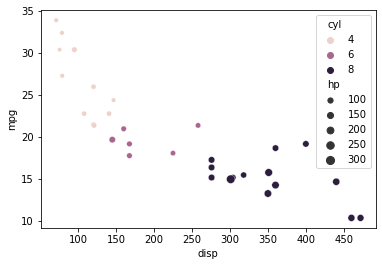

In [71]:
# We can even add a fourth dimension effortlessly
sns.scatterplot(x = "disp", y = "mpg", data = cars, hue = "cyl", size = "hp")
# By default, positioned to not overlap any data
# Put the legend outside the chart
# https://www.statology.org/seaborn-legend-position/
plt.show()

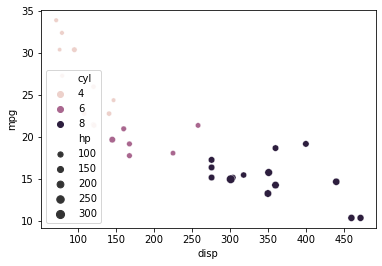

In [73]:
# Notice that no points are covered - that is built in but customizable
ax = sns.scatterplot(x = "disp", y = "mpg", data = cars, hue = "cyl", size = "hp")
# Put the legend outside the chart
sns.move_legend(ax, "lower left")
# https://www.statology.org/seaborn-legend-position/
plt.show()

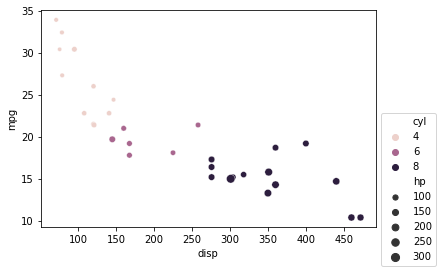

In [75]:
# Or you can move the legend outside the chart
sns.scatterplot(x = "disp", y = "mpg", data = cars, hue = "cyl", size = "hp")
plt.legend(bbox_to_anchor = (1, 0.55))
plt.show()

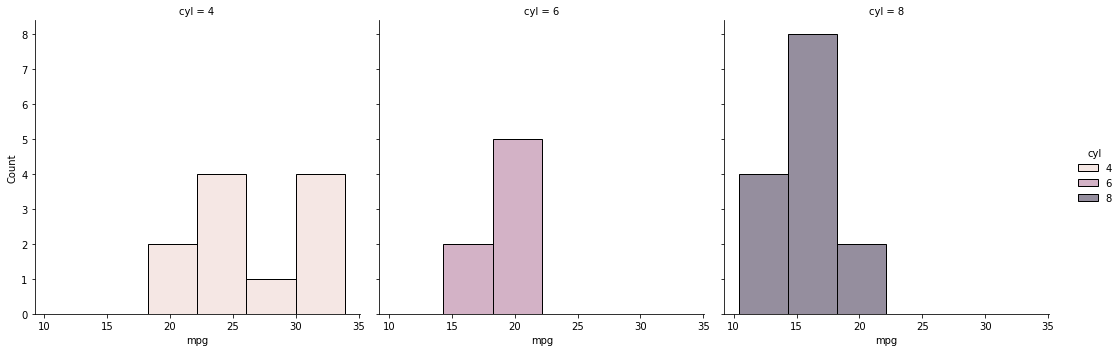

In [76]:
# Using the col parameter, subplotting is much easier than in matplotlib
sns.displot(x = "mpg", hue = "cyl", col = "cyl", data = cars)
# Displot is a histogram function
# Hue = color (same as 3D above but for bar charts)
# Col = column
# Col will create subplots based on discrete values
# Make sure that your column is discrete!
plt.show()
# Being able to create such a complex plot in one line shows the impressive power of seaborn
# Also, arguments such as hue are portable between different chart types

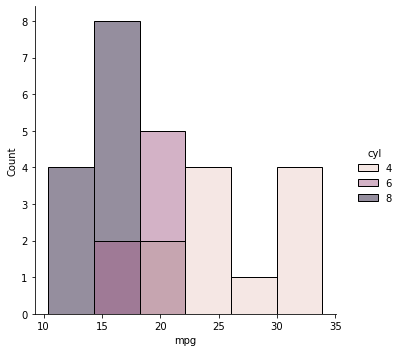

In [77]:
# Without the subplot, we have overlapping data - although this is interesting too
sns.displot(x = "mpg", hue = "cyl", data = cars)

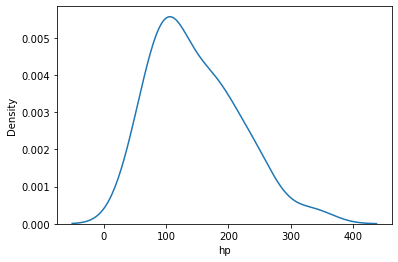

In [45]:
# Probability density charts: kdeplot
sns.kdeplot(x = "hp", data = cars)
# x = value, y = frequency of that value
# 0.005% of cars have hp of around 100
# KDE = Kernel density estimate
plt.show()

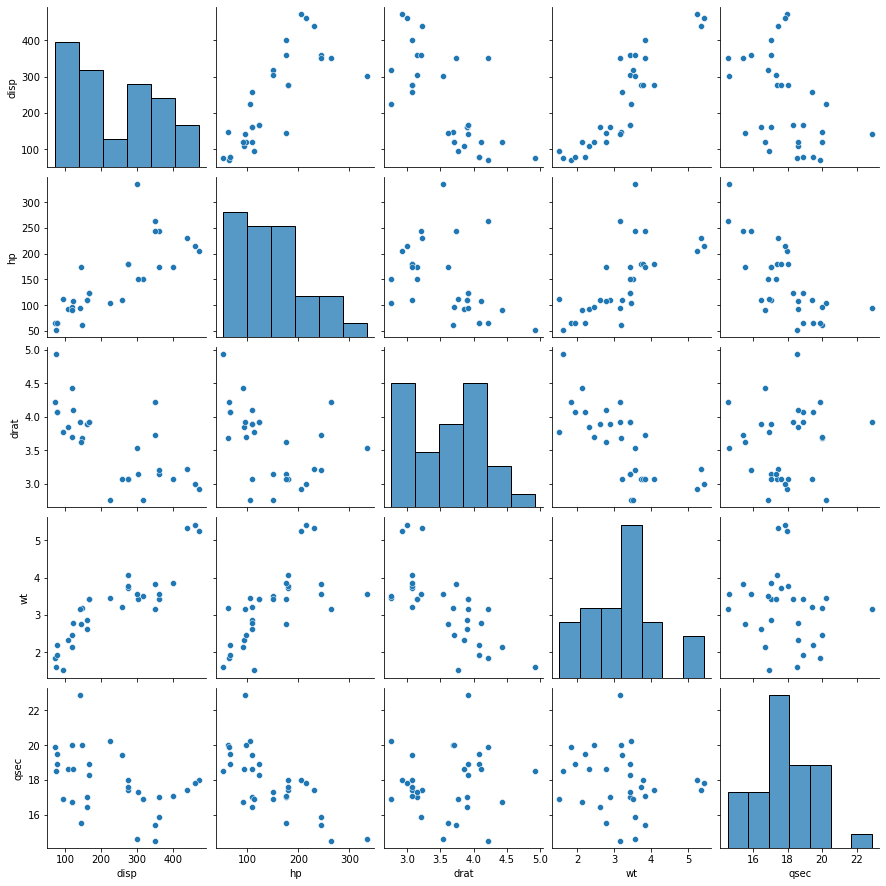

In [78]:
# Pairplot lets us look at the relationships between many or all of the quantitative variables in the dataset
sns.pairplot(cars, vars = cars.columns[3:8])
# Where each variable intersects itself, we have a histogram.
# Where variables intersect each other, we have a scatterplot of their relationship.
plt.show()

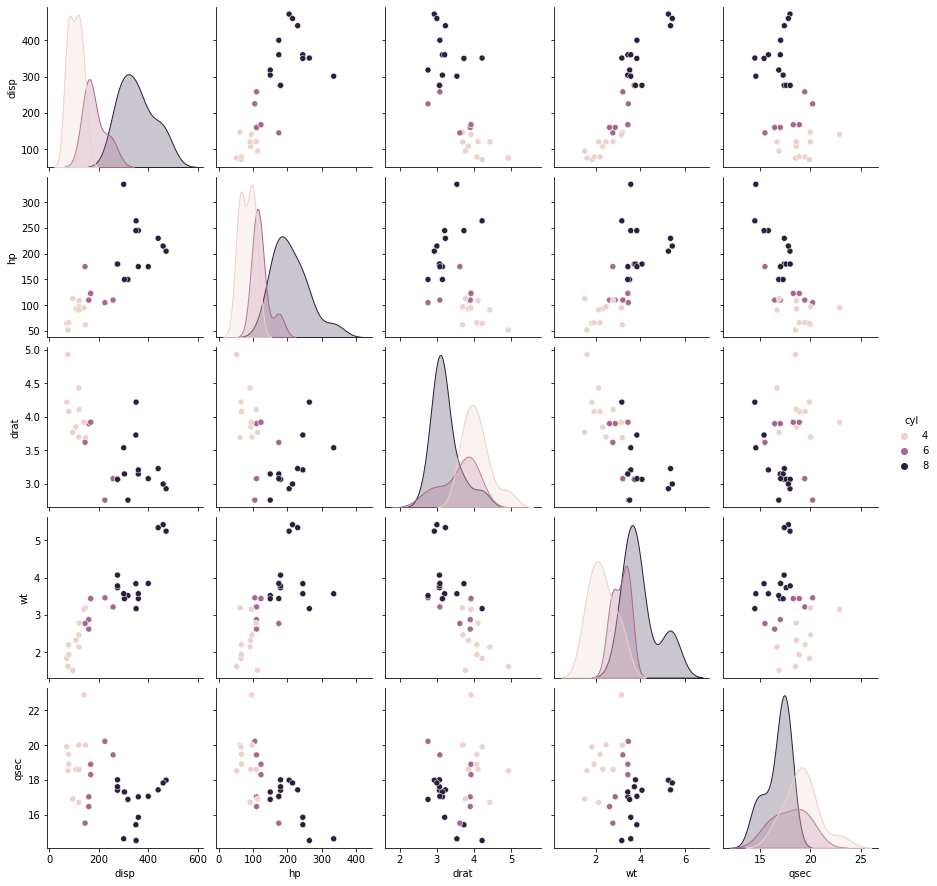

In [48]:
# Let's add another variable as a third dimension
sns.pairplot(cars, vars = cars.columns[3:8], hue = "cyl")
# Now...
# Where variables intersect themselves, we have a KDE plot broken down by cylinder
# Where variables intersect each other, we have a 3D scatterplot
plt.show()

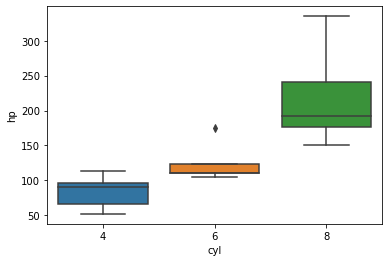

In [79]:
# Box plot
sns.boxplot(x = 'cyl', y = "hp", data = cars)
plt.show()
# 1 = Manual, 0 = Automatic
# What's going on here?
# Values are grouped by cylinder's 3 unique values
# Horsepower for each subset is shown.
# LINES FROM BOTTOM TO TOP
# 1. Median - (IQR * 1.5)
# 2. Quartile 1
# 3. Median
# 4. Quartile 3 (50% of data is in the box)
# 5. Median + (IQR * 1.5)
# Diamond character is an outlier (above Median + (IQR * 1.5))

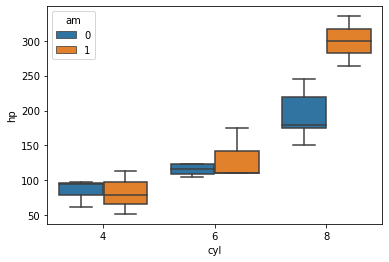

In [53]:
# Box plot with another dimension
sns.boxplot(x = 'cyl', y = "hp", hue = "am", data = cars)
plt.show()

<AxesSubplot:xlabel='cyl', ylabel='hp'>

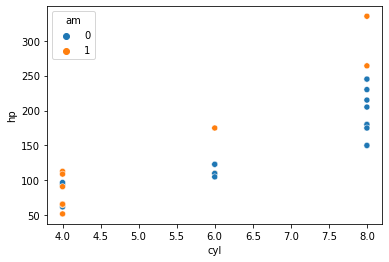

In [81]:
# Viewing a scatterplot with the discrete cyl column is not bad, but there is some overlap between points
sns.scatterplot(data = cars, x = 'cyl', y = 'hp', hue = 'am')

<AxesSubplot:xlabel='cyl', ylabel='hp'>

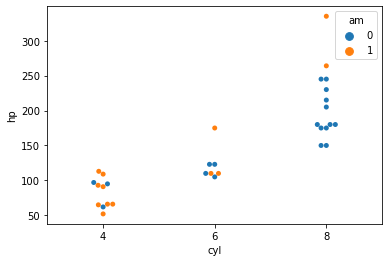

In [86]:
# Swarmplot separates the points so there is no overlap
sns.swarmplot(data = cars, x = "cyl", y = "hp", hue = "am")

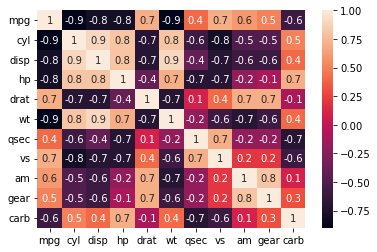

In [87]:
# User friendly visualization of column correlation
# Basic call to heatmap: sns.heatmap(cars.corr())
sns.heatmap(np.round(cars.corr(), 1), annot = True);

In [89]:
# Here's the non-visualized version (we'll get to this in Descriptive Stats)
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


### Summary of Seaborn
In addition to handling multidimensionality effortlessly, Seaborn also has a number of its own chart types. Although customization can be complex, it generally requires less code than matplotlib and very powerful visualizations can be created on one line. The portability of argument names between multiple chart types also speeds up the learning curve. The documentation linked below is especially useful because many pages include step by step graphical walkthroughs. https://seaborn.pydata.org/